## Extracts from: Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 13: Data Reduction 
#### Exercises
### Taner Bulbul
### INST 447

In [416]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Exercise 1
In your own words, describe the similarities and differences between Data Reduction and Data Redundancy from the following angles: the literal meanings of the terms, their objectives, and procedural.


redundancy means something like data not neeeded or not useful. Reduction means making something smaller like making the the amount of data smaller. Objective of removing data redundancy is to eliminate unnecessary data and impact to the analysis. For example redundant data may cause the analysis using regression or K-means grouping methods cause bias in our results. Objective of reduction is to reduce algorithmic and processing complexity (and time),and reduce the complexity for human perception by reducing the dimensions in visualizations. Data reduction also aims to prevent bias and infomation loss and preserve the integrity of the data. Some statistical analysis methods may not be efficient with too many attributes. Procedurally, data redundancy can be identified with multiple attributes having the same data or information or some data may be drived from other attributes or have high correlation between independent attributes. Data reduction on the other hand performed by reducing the number of rows (numerosity data reduction) or reducing the attributes (dimentionality data redcution) and usually reduction of independent attributes that don't correlate to the dependent variable as much or doesn't impact the analysis a lot allowing us to reduce algorithmic complexity and processing time.

#### Exercise 2
If one decides to include or exclude independent attributes based on the correlation coefficient value of each independent attribute with the dependent attribute in a prediction task, how would you label the name of this preprocessing? Data redundancy or data reduction?

This would be data reduction as we are predicting the dependent attribute and picking the independent attributes that have strong/weak correlation to include/exclude for predicting the dependent variable. If we just looked at the correaltion between independent variables to reduce the number of attributes then it would be data redundancy.

#### Exercise 3
In this example, we will be using **new_train.csv** from https://www.kaggle.com/rashmiranu/banking-dataset-classification. Each row of the data contains customer information along with campaign efforts regarding each customer to get them to subscribe for a long-term deposit at the bank. In this example, our analytic goal is to tune a decision tree that can show the trends that leads to successful subscription campaigning. As the only tuning process we know will be computationally very expensive, we have decided to perform one of the numerosity data reductions we’ve learned in this chapter to ease the computation for the tuning process. 

a) Which method would fit this data better? Why? Once you arrived at the data reduction method you want to use apply the method.

In [424]:
customer_df = pd.read_csv('new_train.csv')
customer_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


We can use the stratified sampling to keep the chances of data obects in each group selected the same ratio with multiple random sampling. This makes the chances of dependent variable (long term deposit to the bank) class label keep the same ratio between the random samples of the data obects we use (reduced data set) for our analysis. There is an imbalanced ratio between the y class label (about 88% no, 12 % yes) as shown below and we could have used over/undersampling but it also transforms the data and integrity of the data may change more so I won't use over/undersampling here.

b) Now tune the decision tree and draw the final decision tree (refer to Chapter 7). In the end, comment on a few interesting patterns you found on the final decision tree. 

Appears that data was already cleaned and we can do the analysis.

In [425]:
#check if we have any missing values
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [426]:
#long term deposit to the bank ratios of yes and no stays the same with stratified sampling
# we are randomly sampling 1000 y values and grouping them and checking their ratios to the total to see
# if the ratios stays the same
for i in range(3):
    n,s=len(customer_df),1000
    r = s/n
    sample_df = customer_df.groupby('y', group_keys=False).apply(lambda sdf: sdf.sample(round(len(sdf)*r)))
    print(sample_df.y.value_counts(normalize=True))

no     0.887
yes    0.113
Name: y, dtype: float64
no     0.887
yes    0.113
Name: y, dtype: float64
no     0.887
yes    0.113
Name: y, dtype: float64


In [427]:
#generate stratified 3000 sample dataset
n,s=len(customer_df),3000
r = s/n
sample_customer_df = customer_df.groupby('y', group_keys=False).apply(lambda sdf: sdf.sample(round(len(sdf)*r)))
sample_customer_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
22676,44,admin.,married,university.degree,no,yes,no,cellular,sep,thu,259,1,14,1,success,no
8008,36,blue-collar,married,basic.9y,no,yes,no,telephone,jun,wed,268,1,999,0,nonexistent,no
25683,48,admin.,married,high.school,unknown,yes,no,telephone,jun,tue,306,1,999,0,nonexistent,no
26647,38,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,tue,173,1,999,0,nonexistent,no
15011,32,technician,married,professional.course,no,no,no,cellular,jul,mon,60,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6634,30,unemployed,single,basic.9y,no,no,no,cellular,apr,wed,142,4,999,0,nonexistent,yes
13050,58,management,single,university.degree,no,yes,no,cellular,may,fri,685,2,999,0,nonexistent,yes
7853,55,admin.,married,professional.course,unknown,yes,yes,telephone,nov,tue,514,2,999,0,nonexistent,yes
11968,61,retired,married,basic.4y,no,no,no,telephone,oct,fri,194,1,999,0,nonexistent,yes


In [428]:
#Use 3000 samples to model with stratified sampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

predictors = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']

# for categorical columns, need to convert to to numerical categories
#encoding using pandas get_dummies which does onehot encoding (binary encoding)
#Note that after encoding, columns will change
sample_customer_df = pd.get_dummies(sample_customer_df[predictors])

y =sample_customer_df['y_yes'] # this is our target variable, long term deposits kept
Xs = sample_customer_df.drop(columns=['y_yes','y_no'])

Xs.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
22676,44,259,1,14,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8008,36,268,1,999,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
25683,48,306,1,999,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
26647,38,173,1,999,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
15011,32,60,2,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [429]:
#This will take 10-20 sec to process or longer depending on your computer
param_grid = {
      'criterion':['gini','entropy'],
      'max_depth': [10,20,30,40,50,60],
      'min_samples_split': [10,20,30,40,50],
      'min_impurity_decrease': [0,0.001,
                    0.005, 0.01, 0.05, 0.1]}

gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid, cv=3, 
                          scoring='recall',verbose=1)
gridSearch.fit(Xs, y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best score:  0.4823272229245681
Best parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [432]:
#Use the above best parameters for fitting to the model
classTree = DecisionTreeClassifier(criterion= 'gini', 
                                   max_depth= 20,
                                   min_samples_split= 10,
                                   min_impurity_decrease= 
                                   0.001)
classTree.fit(Xs, y)

DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0.001,
                       min_samples_split=10)

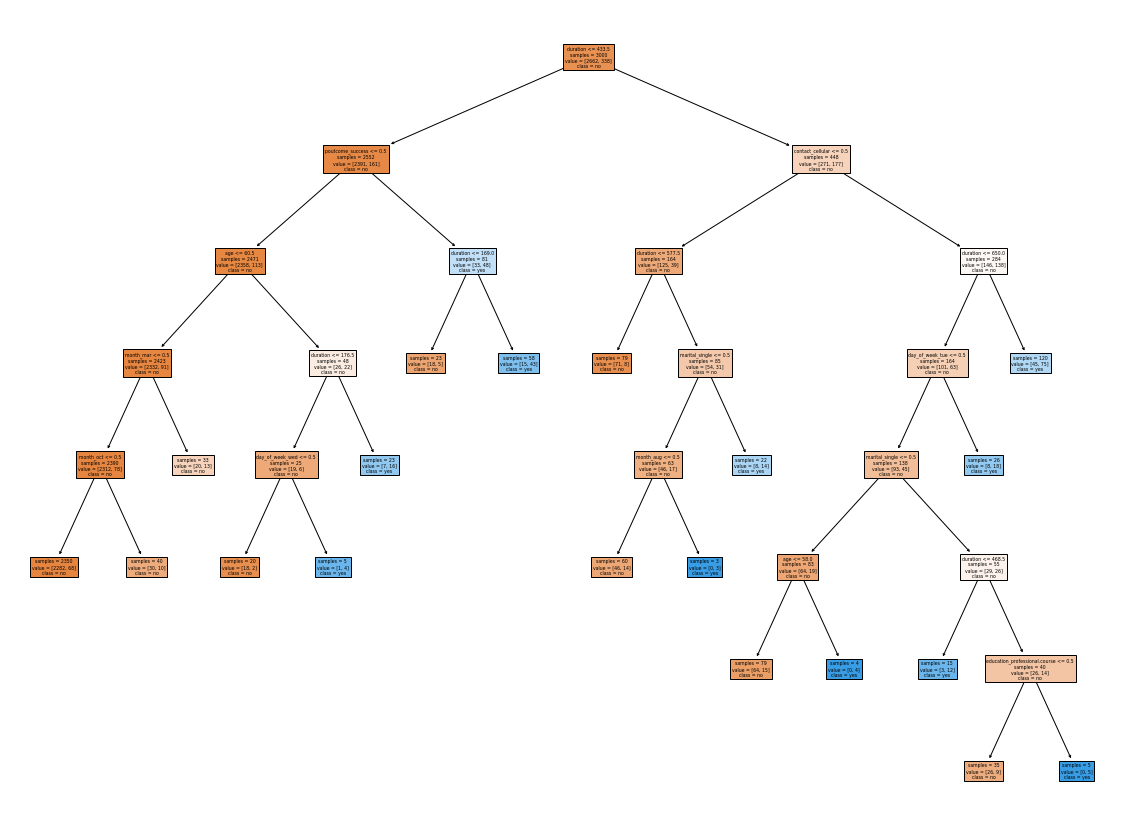

In [434]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(classTree, 
          feature_names=Xs.columns,  
          #class_names= str(y.unique()),
          class_names= ['no','yes'],
          filled=True,
          impurity=False)
plt.show()

### Some conclusions from the decision tree
Decision three shows that duration is important. Duration is the duration of the call to the customer has the most impact. Marketing calls that last less than 433 seconds to be improving the long term deposits. Contacting the customer again in less than 13.5 days (pdays) also improves the long term deposits. Also age less than 36.5 has a positive outcome. Contacting by telephone rather than cellular also is more effective. Month of the contact also important. Looks like calls after September, October are better. Those marketing calls work after all !

#### Exercise 4
In this chapter, we learned six dimensionality reduction methods. For each of the six methods, specify if the method is supervised or unsupervised, and why?

Linear Regression: This is a supervised method because we are trying to predict the dependent attribute by picking the independent attributes for prediction.  
decision tree: This is a supervised method because we are trying to predict the dependent attribute by picking the independent attributes for prediction.  
Random forest:  This is a supervised method because we are trying to predict the dependent attribute by picking the independent attributes for prediction.  
Brute-force: This is a supervised method because we are trying to predict the dependent attribute by picking the independent attributes for prediction.  
Principal Component Analysis (PCA): This is unsupervised reduction method because we are just reducing the number of attributes and not predicting the dependent variable.  
Functional Data Analysis (FDA): This is unsupervised reduction method because we are just reducing the number of attributes and not predicting the dependent variable.

### Chapter 14: Data Transformation and Data Massaging  
#### Exercises

#### Exercise 3
Of course, we know that one of the ways that the color of a data object is presented is by using their names. This is why we would assume color probably should be a normal attribute. However, you can transform this usually nominal attribute to numerical ones. There are two possible approaches. What are they? (Hint: one of them is attribute construction using RGB coding). Apply the two approaches to the following small dataset. The data shown in the table below are accessible in the file color_nominal.csv.

Since color is nominal attribute we can use binary coding or attribute construction.

In [436]:
color_df = pd.read_csv('color_nominal.csv')
color_df.head()

,index,Color
0,1,Blue
1,2,Blue
2,3,Black
3,4,White
4,5,Green


In [437]:
color_df = color_df.drop(columns=['index'])
color_df.head()

,Color
0,Blue
1,Blue
2,Black
3,White
4,Green


In [438]:
#Binary code the colors
bc_color_df = pd.get_dummies(color_df.Color)
bc_color_df.head()

,Black,Blue,Brown,Green,Orange,White,Yellow
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0


   https://www.rapidtables.com/web/color/RGB_Color.html  
   Black: RGB(0,0,0)  
    White: RGB(255,255,255)  
    Red: RGB(255,0,0)  
    Green: RGB(0,128,0)  
    Blue: RGB(0,0,255)  
    Yellow: RGB(255,255,0)  
    Orange:	RGB(255,165,0)
    Brown :	RGB(165,42,42)
    
    RGB = (R*65536)+(G*256)+B

Attribute Construction using RGB codes

In [1]:
rgb_dict = {
'Black':0*65536+0*256+0,
'White': 255*65536+255*256+255,
'Red': 255*65536+0*256+0,
'Green': 0*65536+128*256+0,
'Blue': 0*65536+0*256+255,
'Yellow':  255*65536+255*256+0,
'Orange':255*65536+165*256+0,
'Brown':165*65536+42*256+42
}
rgb_dict

{'Black': 0,
 'White': 16777215,
 'Red': 16711680,
 'Green': 32768,
 'Blue': 255,
 'Yellow': 16776960,
 'Orange': 16753920,
 'Brown': 10824234}

In [440]:
new_color_df= pd.DataFrame()
for i,c in enumerate(color_df.Color):
    new_color_df.at[i,'Color'] = rgb_dict[c]
new_color_df

,Color
0,255.0
1,255.0
2,0.0
3,16777215.0
4,32768.0
5,16753920.0
6,16777215.0
7,255.0
8,10813696.0
9,16776960.0


# Exercise 9

In this chapter we learned three techniques to deal with noise, naming, Smoothing, Aggregation and Binning. Why do you think these methods were covered under Data Transformation, and not under Data Cleaning Level Ⅲ? Explain.

Because noise is unavoidable and natural part of data collection and it is non-systematic unlike the missing values and outliers so these are covered under data transformation. Data cleaning level III dealt with systematic errors.

# Exercise 12
Use United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv to recreate Figure 14.21. You may want to pull the most updated data from https://catalog.data.gov/dataset/united-states-covid-19-cases-and-deaths-by-state-over-time to develop an updated visualization. (Hint: you will need to work with the two columns new_case and new_death)  


Note: The question actually meant to recreate Fig 14.24 in the book

In [441]:
dayStateCOVID_df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
dayStateCOVID_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN


In [442]:
dayStateCOVID_df.drop(columns = ['tot_cases','conf_cases','prob_cases','pnew_case','tot_death',
                                 'conf_death','prob_death','pnew_death','created_at',
                                 'consent_cases','consent_deaths'], inplace=True )

In [443]:
#Data is level I cleaned already
dayStateCOVID_df

,submission_date,state,new_case,new_death
0,03/11/2021,KS,0,0
1,12/01/2021,ND,589,9
2,01/02/2022,AS,0,0
3,11/22/2021,AL,703,7
4,05/30/2022,AK,0,0
...,...,...,...,...
60055,02/09/2021,TX,13329,207
60056,11/20/2020,FL,8217,79
60057,08/17/2020,NM,92,4
60058,06/17/2020,MS,521,9


In [445]:
#More cleaning, reformat date
from datetime import datetime

dayStateCOVID_df['submission_date'] = pd.to_datetime(dayStateCOVID_df['submission_date'])
dayStateCOVID_df.head()

,submission_date,state,new_case,new_death
0,2021-03-11,KS,0,0
1,2021-12-01,ND,589,9
2,2022-01-02,AS,0,0
3,2021-11-22,AL,703,7
4,2022-05-30,AK,0,0


In [446]:
#Check for missing values, don't have any missing values
dayStateCOVID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60060 entries, 0 to 60059
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  60060 non-null  datetime64[ns]
 1   state            60060 non-null  object        
 2   new_case         60060 non-null  int64         
 3   new_death        60060 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.8+ MB


In [447]:
# Graph in the book is from Jan 12 2020 to Oct 12 2021. We can drop other entries to match the graph in the book
enddate = datetime(year=2021, month=9, day=12)
startdate = datetime(year=2020, month=1, day=12)
BM = (dayStateCOVID_df.submission_date >= startdate) & (dayStateCOVID_df.submission_date <= enddate)
dayStateCOVID_df = dayStateCOVID_df[BM]
dayStateCOVID_df

,submission_date,state,new_case,new_death
0,2021-03-11,KS,0,0
5,2020-05-17,RMI,0,0
6,2020-04-03,ND,14,0
7,2021-09-04,PR,667,8
8,2021-05-09,PW,0,0
...,...,...,...,...
60054,2021-06-23,IN,282,5
60055,2021-02-09,TX,13329,207
60056,2020-11-20,FL,8217,79
60057,2020-08-17,NM,92,4


In [448]:
dayStateCOVID_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 60058
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  36000 non-null  datetime64[ns]
 1   state            36000 non-null  object        
 2   new_case         36000 non-null  int64         
 3   new_death        36000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.4+ MB


In [449]:
#Filter only California  rows
CA_BM = dayStateCOVID_df.state == 'CA'
ca_df = dayStateCOVID_df[CA_BM]
ca_df

,submission_date,state,new_case,new_death
15543,2020-06-11,CA,3090,106
15553,2020-08-18,CA,4636,31
15562,2021-02-25,CA,4965,1178
15573,2021-02-10,CA,8390,520
15576,2020-09-06,CA,4905,123
...,...,...,...,...
44304,2021-05-16,CA,1370,55
44326,2021-06-04,CA,1047,87
44350,2021-07-12,CA,8910,96
44384,2020-03-21,CA,218,6


In [450]:
# CA weekly statistics
#group by new cases and average of weekly California cases
ca_weekly_newcase_df = ca_df.groupby(pd.Grouper(freq='W', key='submission_date'))['new_case'].mean()

#group by new deaths average of weekly California cases
ca_weekly_newdeath_df = ca_df.groupby(pd.Grouper(freq='W', key='submission_date'))['new_death'].mean()
ca_weekly_newdeath_df

submission_date
2020-01-26      0.000000
2020-02-02      0.000000
2020-02-09      0.000000
2020-02-16      0.000000
2020-02-23      0.000000
                 ...    
2021-08-15    -18.428571
2021-08-22     70.142857
2021-08-29     81.285714
2021-09-05    103.142857
2021-09-12    105.142857
Freq: W-SUN, Name: new_death, Length: 86, dtype: float64

In [451]:
# US total daily new cases and new deaths

#group by  date and sum
new_death_daily_df = dayStateCOVID_df.groupby(dayStateCOVID_df.submission_date).new_death.sum()
new_case_daily_df = dayStateCOVID_df.groupby(dayStateCOVID_df.submission_date).new_case.sum()

new_case_daily_df

submission_date
2020-01-22         4
2020-01-23         2
2020-01-24         1
2020-01-25         0
2020-01-26         1
               ...  
2021-09-08    170481
2021-09-09    184210
2021-09-10    172315
2021-09-11    153580
2021-09-12    114226
Name: new_case, Length: 600, dtype: int64

In [452]:
new_death_daily_df

submission_date
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2021-09-08    2078
2021-09-09    2257
2021-09-10    2257
2021-09-11    1744
2021-09-12    1134
Name: new_death, Length: 600, dtype: int64

In [453]:
# US weekly new cases and new deaths

#https://stackoverflow.com/questions/59246839/pandas-group-by-date-weekly
#new_case_weekly_df = dayStateCOVID_df.resample('W', on= 'submission_date')['new_case'].mean()

#groupby weekly new cases
new_case_weekly_df = dayStateCOVID_df.groupby(pd.Grouper(freq='W', key='submission_date'))['new_case'].sum()
new_case_weekly_df = new_case_weekly_df/7.0  #weekly average

#groupby weekly new cases
new_death_weekly_df = dayStateCOVID_df.groupby(pd.Grouper(freq='W', key='submission_date'))['new_death'].sum()
new_death_weekly_df = new_death_weekly_df/7.0  #weekly average

new_case_weekly_df

submission_date
2020-01-26         1.142857
2020-02-02         0.714286
2020-02-09         1.000000
2020-02-16         0.571429
2020-02-23         3.428571
                  ...      
2021-08-15    132215.714286
2021-08-22    148312.285714
2021-08-29    156988.571429
2021-09-05    163741.142857
2021-09-12    146567.428571
Freq: W-SUN, Name: new_case, Length: 86, dtype: float64

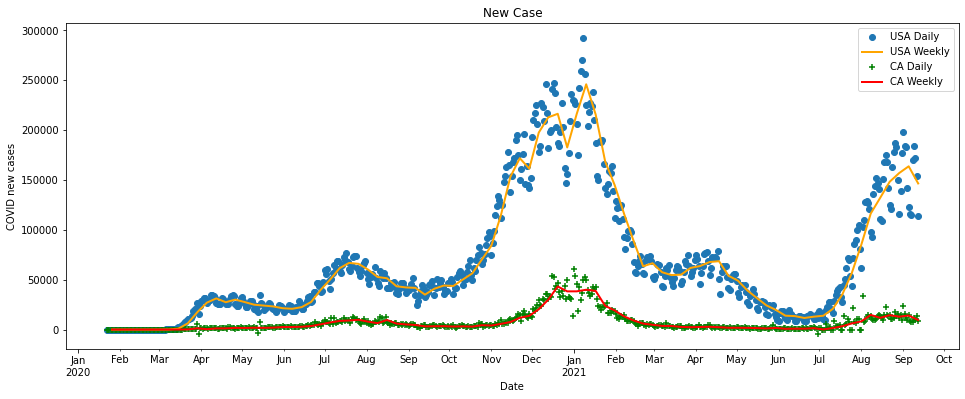

In [460]:
#Graph New Cases
from matplotlib import dates as mdates

fig,ax=plt.subplots(1, 1, figsize=(16, 6))
ax.scatter(new_case_daily_df.index,new_case_daily_df.values, label="USA Daily") #US daily new cases
ax.plot(new_case_weekly_df.index,new_case_weekly_df.values, color='orange', linewidth=2, label="USA Weekly")  # US weekly new cases
ax.scatter(ca_df.submission_date,ca_df.new_case,color='green',label="CA Daily", marker='+')  # CA daily new cases
ax.plot(ca_weekly_newcase_df.index,ca_weekly_newcase_df.values,color='red', linewidth=2, label="CA Weekly") # CA weekly new cases

plt.title('New Case')
plt.xlabel('Date')
plt.ylabel('COVID new cases')
plt.legend(loc='upper right', ncol=1)

#Add X axis labels
#Use some of the code here
#https://stackoverflow.com/questions/53013184/formatting-month-name-abbreviation-jan-feb-within-datetime

years = mdates.YearLocator()
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b')
yearsFmt = mdates.DateFormatter('%b\n%Y')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.show()

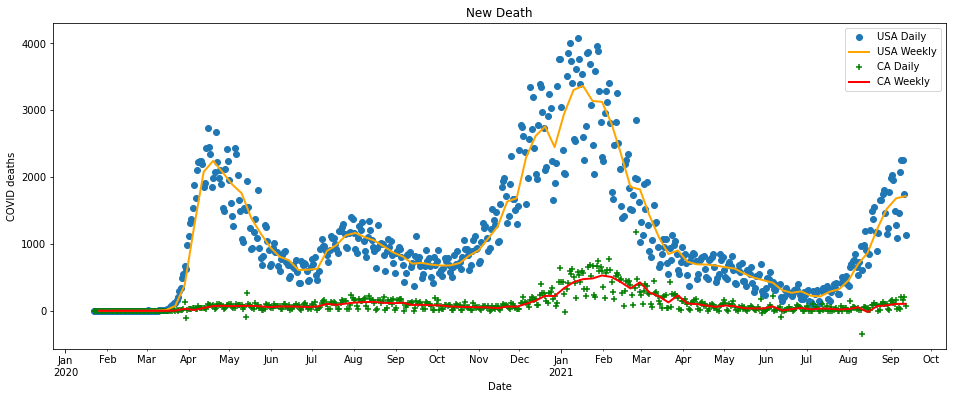

In [459]:
#Graph New Deaths
from matplotlib import dates as mdates

fig,ax=plt.subplots(1, 1, figsize=(16, 6))
ax.scatter(new_death_daily_df.index,new_death_daily_df.values, label="USA Daily") #US daily new deaths
ax.plot(new_death_weekly_df.index,new_death_weekly_df.values, color='orange', linewidth=2, label="USA Weekly") # US weekly new deaths
ax.scatter(ca_df.submission_date,ca_df.new_death,color='green',label="CA Daily", marker='+') # CA daily new deaths
ax.plot(ca_weekly_newdeath_df.index,ca_weekly_newdeath_df.values,color='red', linewidth=2, label="CA Weekly") # CA weekly new deaths
plt.title('New Death')
plt.xlabel('Date')
plt.ylabel('COVID deaths')
plt.legend(loc='upper right', ncol=1)

#Add X axis labels
#Use some of the code here
#https://stackoverflow.com/questions/53013184/formatting-month-name-abbreviation-jan-feb-within-datetime

years = mdates.YearLocator()
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b')
yearsFmt = mdates.DateFormatter('%b\n%Y')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.show()

# Exercise 13
It may seem like that binning and aggregation are the same method, however, they are not. Study the two examples in this chapter and explain what’s the difference between Aggregation and binning?


Binning is reducing noise by grouping a range of values under the same bin and the y axis shows the frequency or count of those in that bin. A histogram is basically binning. Aggeragation adds up/aggregates the smaller interval values to larger intervals have less intervals in the x-axis so it also reduces the noise but it is aggerating for example minute data to hourly sum but binning doesn't add the values just groups a range of values.